### ENSIMAG – Grenoble INP – UGA - Academic year 2025-2026
# Introduction to Statistical Learning and Applications ([website](https://github.com/ISLA-Grenoble/2026-main))

- Pedro L. C. Rodrigues -- `pedro.rodrigues@inria.fr`

- Isabella Costa Maia -- `isabella.costa-maia@grenoble-inp.fr`

***

### ⚠️ General guidelines for TPs

Each team shall upload its report on [Teide](https://teide.ensimag.fr/) before the deadline indicated at the course website. Please
**include the name of all members** of the team on top of your report.
The report should contain graphical representations and explanatory text. For each graph, axis names should be provided as well
as a legend when it is appropriate. Figures should be explained by a few sentences in the text. Answer to
the questions in order and refer to the question number in your report. Computations and
graphics have to be performed in `python`. The report should be written as a jupyter notebook. This is a file format that allows users to format documents containing text written in markdown and `python` instructions. You should include all of the `python` instructions that you have used in the document so that it may be possible to replicate your results.

***

# 🖥️ TP1: Analysis of prostate cancer data

A medical study done on patients with prostate cancer aims to analyze the correlation between the prostate tumor volume and a set of clinical and morphometric variables. These variables include prostate specific antigens, a biomarker for prostate cancer, and a number of clinical measures (age, prostate weight, etc). The goal of this lab is to build a regression model to predict the severity of cancer, expressed by logarithm of the tumor volume -- `lcavol` variable -- from the following predictors:
- `lpsa`: log of a prostate specific antigen
- `lweight`: log of prostate weight
- `age`: age of the patient
- `lbph`: log of benign prostatic hyperplasia amount
- `svi`: seminal vesicle invasion
- `lcp`: log of capsular penetration
- `gleason`: Gleason score (score on a cancer prognosis test)
- `pgg45`: percent of Gleason scores 4 or 5

The file `prostate.data`, available [here](https://github.com/ISLA-Grenoble/2025-main/blob/main/TP/TP1/prostate.data), contains measures of the logarithm of the tumor
volume and of the 8 predictors for 97 patients. This file also contains an additional variable, called `train`, which will
not be used and has to be removed.

## ▶️ Exercise 1: Preliminary analysis of the data (1 points)

**(a)** Download the file `prostate.data` and store it in your current folder. Read the dataset in using `pandas` as per
```
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
```
check how to use function `df.drop` to remove the first and last columns of `df` containing useless tags.

In [64]:
import pandas as pd
df = pd.read_csv("prostate.data", sep="\t")
df = df.drop(df.columns[[0, -1]], axis=1)
print(df)

      lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45      lpsa
0  -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0 -0.430783
1  -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0 -0.162519
2  -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20 -0.162519
3  -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0 -0.162519
4   0.751416  3.432373   62 -1.386294    0 -1.386294        6      0  0.371564
..       ...       ...  ...       ...  ...       ...      ...    ...       ...
92  2.830268  3.876396   68 -1.386294    1  1.321756        7     60  4.385147
93  3.821004  3.896909   44 -1.386294    1  2.169054        7     40  4.684443
94  2.907447  3.396185   52 -1.386294    1  2.463853        7     10  5.143124
95  2.882564  3.773910   68  1.558145    1  1.558145        7     80  5.477509
96  3.471966  3.974998   68  0.438255    1  2.904165        7     20  5.582932

[97 rows x 9 columns]


**(b)** The function defined below generates scatterplots (clouds of points) between all pairs of variables, allowing us to visually analyse the correlations between all variables in the dataframe. Explain what each line of function `pairplot` does and how it affects the final plot. You can use command `help` in the `python` shell to get the documentation of each function.

``` 
# import the main plotting library for python
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()
```

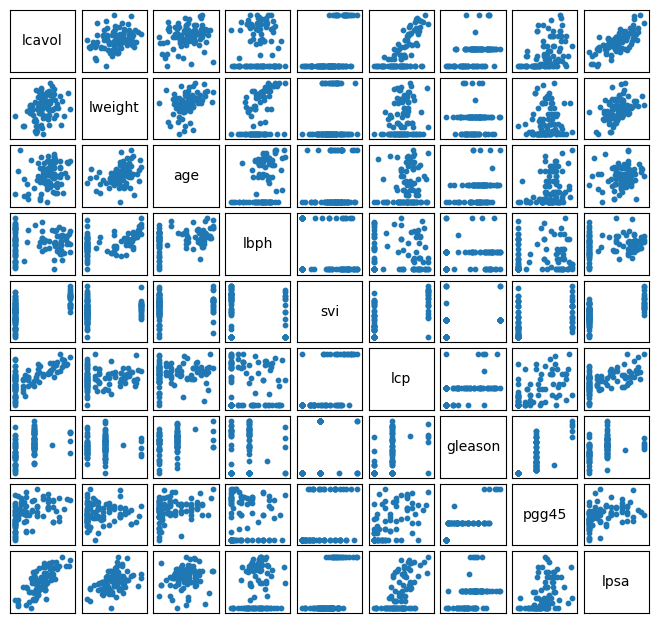

In [65]:
import matplotlib.pyplot as plt

# make a pairplot from scratch
def pairplot(df, figsize=None):
    if figsize is None:
        figsize = (7.10, 6.70)
    n_vars = df.shape[1]
    fig, ax = plt.subplots(figsize=figsize, ncols=n_vars, nrows=n_vars)
    plt.subplots_adjust(
        wspace=0.10, hspace=0.10, left=0.05, right=0.95, bottom=0.05, top=0.95)
    for i in range(n_vars):
        for j in range(n_vars):
            axij = ax[i][j]
            i_name = df.columns[i]
            j_name = df.columns[j]
            axij.set_xticks([])
            axij.set_yticks([])
            axij.margins(0.1)
            if i != j:
                axij.scatter(df[i_name], df[j_name], s=10)
            else:
                axij.text(0.5, 0.5, i_name, fontsize=10,
                              horizontalalignment='center',
                              verticalalignment='center',
                              transform = axij.transAxes)        
    return fig, ax

fig, ax = pairplot(df)
plt.show()

**(c)** Based on the generated figure, identify which variables seem the most correlated to `lcavol`. Also, infer the datatype for each of the predictors.

'lpsa' and 'lcp' seem the most correlated to 'lcavol' through a linear relationship. 

**(d)** Recall the formula of correlation between two vectors and implement it with `numpy`. Explain the difference of your result when compared to `df.corr()`. Change the function `pairplot`to show the correlation coefficient on the upper triangle of the subplots. (Bonus) Use locally weighted scatterplot smoothing (LOWESS) to see the trends between pairs of features with `statsmodels.nonparametric.smoothers_lowess`.

$$
\rho(x,y)=\frac{\displaystyle\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\displaystyle\sum_{i=1}^n(x_i-\overline{x})²\displaystyle\sum_{i=1}^n(y_i-\overline{y})²}}
$$

In [66]:
import numpy as np
def corr_numpy(x, y):
    x = np.asarray(x)
    y = np.asarray(y)

    x_0 = x - x.mean()
    y_0= y - y.mean()

    num = np.sum(x_0 * y_0)
    den = np.sqrt(np.sum(x_0**2) * np.sum(y_0**2))

    return num / den

print("lpsa :")
print(corr_numpy(df["lcavol"], df["lpsa"]))
print(df.corr().loc["lcavol", "lpsa"])

print("lcp :")
print(corr_numpy(df["lcavol"], df["lcp"]))
print(df.corr().loc["lcavol", "lcp"])


lpsa :
0.7344603262136731
0.734460326213673
lcp :
0.6753104840558688
0.675310484055869


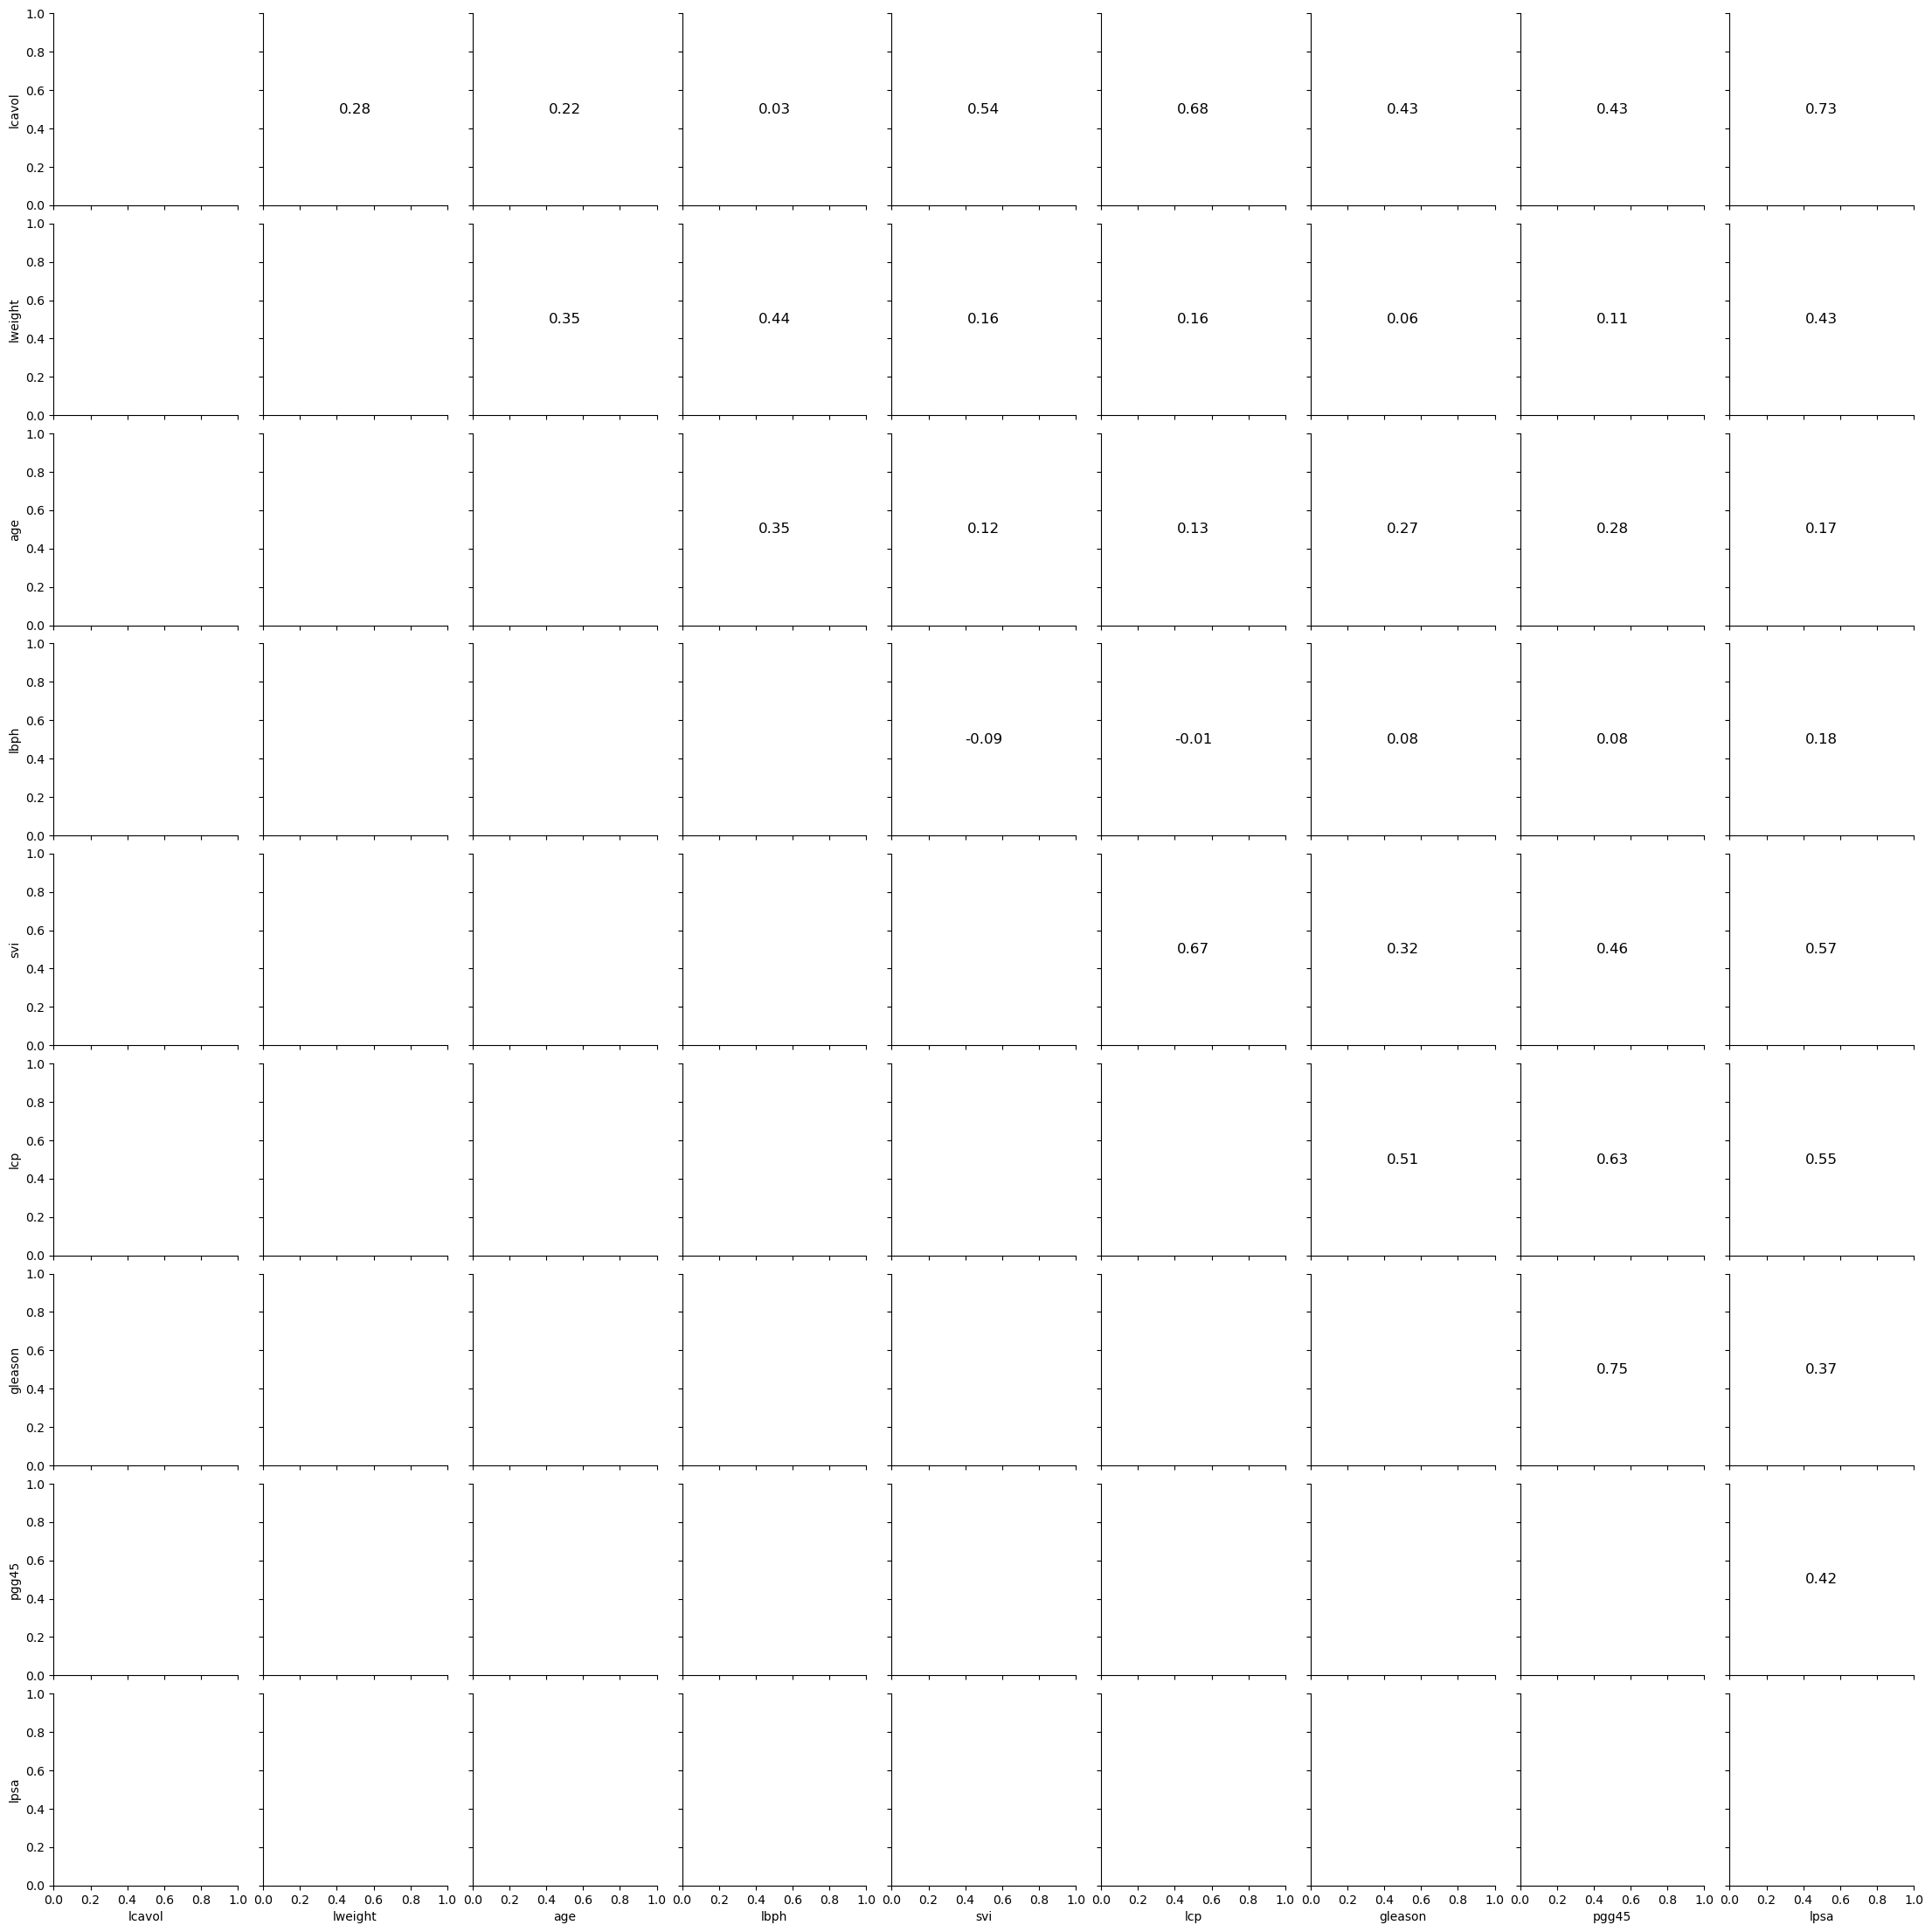

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

def corr_text(x, y, **kws):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f"{r:.2f}", xy=(0.5, 0.5),
                xycoords=ax.transAxes,
                ha="center", va="center", fontsize=12)

g = sns.PairGrid(df)
#g.map_lower(sns.scatterplot)
#g.map_diag(sns.histplot)
g.map_upper(corr_text)

plt.show()

## ▶️ Exercise 2: Linear regression (7 points)

In this exercise, we will perform a multiple linear regression to build a predictive model for the `lcavol` variable. The variables `gleason` and `svi` should be considered as qualitative variables. You can declare them as such with

```
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")
```

**(a)** Provide the mathematical equation of the regression model (note that you can use LaTeX to write equations) and define the diﬀerent parameters. 

$$
Y=\beta_0 +\displaystyle\sum_{i=1}^8 \beta _i X_i +\varepsilon
$$

where $Y$ is the `lcavol` variable and $X_i$ are the 8 predictors from `lpsa` to `pgg45`.

**(b)** Before doing the linear regression of this TP, you will first have to handle the one-hot encoding of the categorical features of the dataframe. One way of doing this is as follows:

```
# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])
# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']
```

- Why did we fix a `dtype` in `pd.get_dummies`?
- Why did we drop two columns after the encoding?
- Why did we add a column of ones to the dataframe?

- Why did we fix a `dtype` in `pd.get_dummies`? Because `pd.get_dummies` may create vectors of True/False but we need real numbers in our matrix $X$.

- Why did we drop two columns after the encoding? As we said in class, $svi_0+svi_1=1$ so they aren't independent. However we need to have : $X^TX\in\mathcal{GL}(\mathbb{R})$

- Why did we add a column of ones to the dataframe?  This column is associeted to the parameter $\beta_0$.

**(c)** We will use the [`statsmodels`](https://www.statsmodels.org/) package to estimate the coefficients of the multiple linear regression as per:

```
# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
```

Use command `results.sumary()` to get the statistical summary of the estimated coefficients. 

- Explain to what correspond the regression coeﬃcients for the lines related to `svi` and `gleason`. 

- What would have happened in the regression if we did not do the one-hot encoding from above?

- Comment the overall results of the regression as well.

In [68]:
df['svi'] = df['svi'].astype("category")
df['gleason'] = df['gleason'].astype("category")

# encode the categorical features with dummy variables
df_enc = pd.get_dummies(df, dtype=np.float64)
# to drop one dummy column for each predictor
df_enc = df_enc.drop(columns=['svi_0', 'gleason_6'])

# add a column of ones to the dataframe
df_enc['intercept'] = 1
# extract the dataframe for predictors
X = df_enc.drop(columns=['lcavol'])
# get the observed values to predict
y = df['lcavol']


# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y, X)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     18.83
Date:                Mon, 09 Feb 2026   Prob (F-statistic):           9.05e-18
Time:                        22:21:13   Log-Likelihood:                -96.825
No. Observations:                  97   AIC:                             215.7
Df Residuals:                      86   BIC:                             244.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight       -0.0112      0.211     -0.053      0.958      -0.432       0.409
age            0.0248      0.011      2.205      0.030       0.002       0.047
lbph          -0.1042      0.058     -1.790      0.077      -0.220       0.012
lcp            0.4028      0.085      4.734      0.000       0.234       0.572
pgg45         -0.0094      0.005     -2.080      0.040      -0.018      -0.000
lpsa           0.5496      0.090      6.100      0.000       0.370       0.729
svi_1         -0.2204      0.256     -0.860      0.392      -0.730       0.289
gleason_7      0.3117      0.215      1.448      0.151      -0.116       0.740
gleason_8     -0.7106      0.759     -0.936      0.352      -2.219       0.798
gleason_9      0.7901      0.488      1.621      0.109      -0.179       1.759
intercept     -1.4067      0.874     -1.609      0.111      -3.145       0.332
==============================================================================
Omnibus:                        0.107   Durbin-Watson:                   2.306
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.127
Skew:                          -0.073   Prob(JB):                        0.939
Kurtosis:                       2.900   Cond. No.                         884.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Explain to what correspond the regression coeﬃcients for the lines related to `svi` and `gleason` : 

    we see that $\beta_{svi_1}=-0.2204 = \mathbb{E}(`lcavol`|`svi`=1)-\mathbb{E}(`lcavol`|`svi`=0)$

    We also have : $\beta_{gleason_7}=0.3117$, $\beta_{gleason_8}=0.3117$ and $\beta_{gleason_9}=0.7901$. And we have : $$\beta_{gleason_i}=\mathbb{E}(`lcavol`|`gleason`=k)-\mathbb{E}(`lcavol`|`gleason`=6)$$


- What would have happened in the regression if we did not do the one-hot encoding from above?

    The matrix $X^TX$ wouldn't be invertible.
 
- Comment the overall results of the regression as well.

    According to the p_value we can say that the `lcavol` doesn't depend on `gleason`, `svi`, `lweight` and `lbph`, they are not significant for $\alpha=0.05$.
    In addition we have : Prob (F-statistic)=9.05e-18, and this means that the regression model is highly statistically significant.


**(d)** Use `results.conf_int` to get confidence intervals of level 95% for all the coeﬃcients of the predictors. Comment the results.

In [69]:
ci = results.conf_int(alpha=0.05)
ci.columns = ["[0.025", "0.975]"]
ci

,[0.025,0.975]
lweight,-0.431600,0.409107
age,0.002436,0.047129
lbph,-0.219914,0.011515
lcp,0.233639,0.571880
pgg45,-0.018469,-0.000419
lpsa,0.370474,0.728673
svi_1,-0.730029,0.289190
gleason_7,-0.116263,0.739616
gleason_8,-2.219087,0.797911
gleason_9,-0.179004,1.759273


The significant variables are the ones for wich 0 in not in the confidence interval of level 95% : `age`, `lcp` and `lpsa`

**(e)** What can you say about the eﬀects of the `lpsa` variable? Relate your answer to the $p$-value of a hypothesis test and a confidence interval. You can use `results.pvalues`.

In [70]:
results.pvalues

lweight      9.577075e-01
age          3.014993e-02
lbph         7.695609e-02
lcp          8.577858e-06
pgg45        4.047741e-02
lpsa         2.939241e-08
svi_1        3.922717e-01
gleason_7    1.512950e-01
gleason_8    3.516744e-01
gleason_9    1.087313e-01
intercept    1.113676e-01
dtype: float64

The $p$ _value of lpsa is 2.939241e-08, wich is the smallest one. Therefore `lpsa` is the most significant variable in the model.

**(f)** Implement yourself a function that calculates the values of the parameters and their corresponding $p$-values. Bonus: explain why `numpy.linalg.inv` is not necessarily the best choice for estimating the parameters as compared to `numpy.linalg.solve`.

**(g)** Plot the predicted values of `lcavol` as a function of the actual values. For this, you can can use `results.get_prediction` to get predictions over `X` and then get its `predicted_mean` attribute.

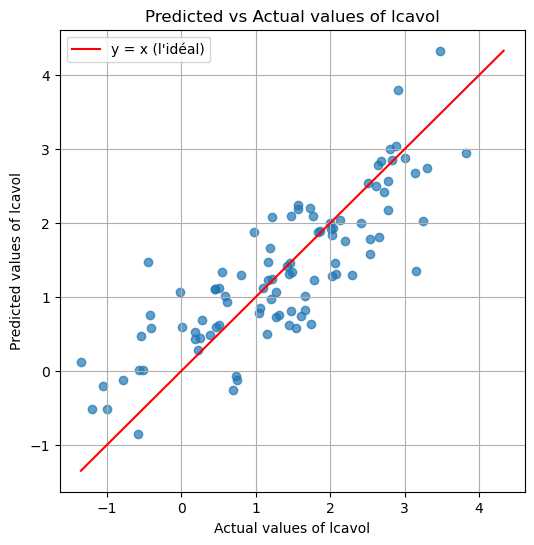

In [71]:
pred = results.get_prediction(X)
y_hat = pred.predicted_mean

plt.figure(figsize=(6, 6))

# scatter plot
plt.scatter(y, y_hat, alpha=0.7)

# ligne y = x (prédiction parfaite)
lims = [min(y.min(), y_hat.min()), max(y.max(), y_hat.max())]
plt.plot(lims, lims, 'r', label="y = x (l'idéal)")

plt.xlabel("Actual values of lcavol")
plt.ylabel("Predicted values of lcavol")
plt.title("Predicted vs Actual values of lcavol")
plt.legend()
plt.grid(True)

plt.show()

**(h)** Plot the histogram of residuals as well as their qq-plot using `statsmodels` function `qqplot`. Can we admit that the residuals are normally distributed? Compute the residual sum of squares (RSS).

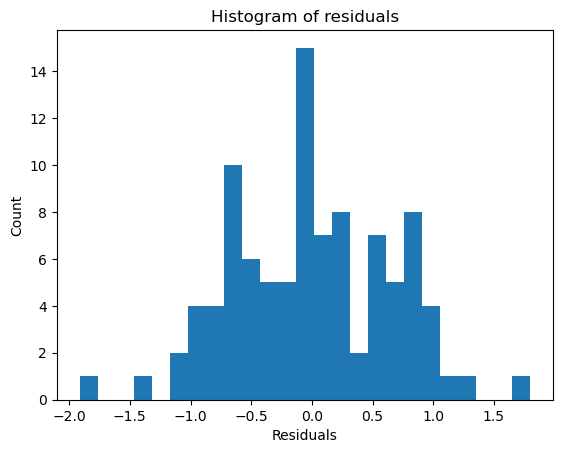

In [72]:
resid = y - y_hat 

plt.figure()
plt.hist(resid, bins=25)
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.title("Histogram of residuals")
plt.show()


<Figure size 640x480 with 0 Axes>

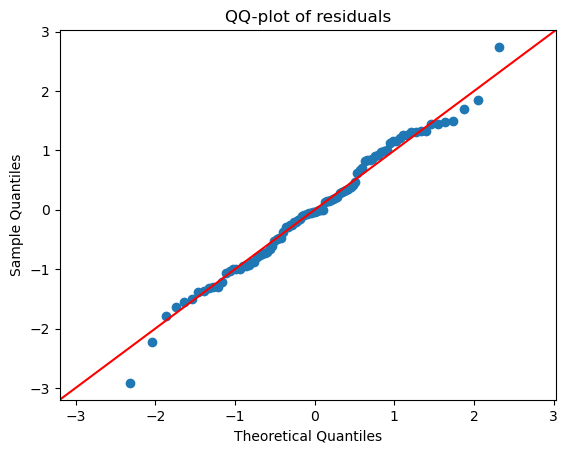

In [73]:
import statsmodels.api as sm

plt.figure()
sm.qqplot(resid, line="45", fit=True)
plt.title("QQ-plot of residuals")
plt.show()

**(i)** What happens if predictors `lpsa` and `lcp` are removed from the multiple linear regression model? Note that you can pass a list of strings to `df.columns.drop` method.

In [74]:
df1 = df.drop(columns=["lpsa", "lcp"])
df1['svi'] = df1['svi'].astype("category")
df1['gleason'] = df1['gleason'].astype("category")

# encode the categorical features with dummy variables
df1_enc = pd.get_dummies(df1, dtype=np.float64)
# to drop one dummy column for each predictor
df1_enc = df1_enc.drop(columns=['svi_0', 'gleason_6'])

# add a column of ones to the dataframe
df1_enc['intercept'] = 1
# extract the dataframe for predictors
X1 = df1_enc.drop(columns=['lcavol'])
# get the observed values to predict
y1 = df1['lcavol']


# import required package
import statsmodels.api as sm
# this line does not fit the regression model per se but only builds it
model = sm.OLS(y1, X1)
# now we actually fit the model, e.g. calculate all of regression parameters
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lcavol   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     8.390
Date:                Mon, 09 Feb 2026   Prob (F-statistic):           2.11e-08
Time:                        22:21:13   Log-Likelihood:                -125.58
No. Observations:                  97   AIC:                             269.2
Df Residuals:                      88   BIC:                             292.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lweight        0.5850      0.259      2.257      0.026       0.070       1.100
age            0.0073      0.015      0.497      0.621      -0.022       0.036
lbph          -0.0746      0.077     -0.967      0.336      -0.228       0.079
pgg45         -0.0004      0.006     -0.076      0.939      -0.012       0.011
svi_1          1.0246      0.271      3.774      0.000       0.485       1.564
gleason_7      0.8007      0.274      2.918      0.004       0.255       1.346
gleason_8      0.6869      0.960      0.715      0.476      -1.221       2.595
gleason_9      1.1726      0.644      1.820      0.072      -0.108       2.453
intercept     -1.9717      1.159     -1.701      0.092      -4.275       0.332
==============================================================================
Omnibus:                        0.297   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.473
Skew:                          -0.013   Prob(JB):                        0.789
Kurtosis:                       2.659   Cond. No.                         882.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The variables `svi`_1 et `gleason`_7 become significant.

## ▶️ Exercise 3: Best subset selection (5 points)

A regression model that uses $k$ predictors is said to be of size $k$. For instance, 

$$
\texttt{lcavol} = \beta_1 \texttt{lpsa} + \beta_0 + \varepsilon \quad \text{and} \quad \texttt{lcavol} = \beta_1 \texttt{lweight} + \beta_0 + \varepsilon
$$

are models of size one. The regression model without any predictor $\texttt{lcavol} = \beta_0 + \varepsilon$ is a model of size 0.

The goal of this exercise is to select the best model of size $k$ for each $k \in \{0, \dots, 8\}$.

**(a)** Compute the residual sums of squares (RSS) for all models of size $k = 2$. Which model has the smallest RSS? Note that you can use a generator [`itertools.combination`](https://docs.python.org/3/library/itertools.html#itertools.combinations) to automatize for you all the combinations of $k$ elements among $n$.

**(b)** For each value of $k \in \{0, \dots, 8\}$, select the set of predictors that minimizes the RSS. Plot these values as a function of $k$. Provide the names of the selected predictors for each value of $k$.

**(c)** Do you think that minimizing the residual sum of squares is well suited to select the optimal size for the regression models? Justify your answer using what you've learned in class.

In [84]:
from itertools import combinations
predictors = X.columns.tolist()
predictors.remove("intercept")

def RSS(X, y):
    model = sm.OLS(y, X)
    return np.sum(model.fit().resid**2)

rss_results = []

for combo in combinations(predictors, 2):
    X_sub = X[list(combo) + ["intercept"]]
    rss = RSS(X_sub, y)
    rss_results.append((combo, rss))
    
best_model = min(rss_results, key=lambda x: x[1])
best_model


(('lcp', 'lpsa'), np.float64(47.27809728978647))

In [89]:
def best_predictors(k):
    rss_results = []
    for combo in combinations(predictors, k):
        X_com = X[list(combo) + ["intercept"]]
        rss = RSS(X_com, y)
        
        rss_results.append((combo, rss))
    best_model = min(rss_results, key=lambda x: x[1])
    return best_model

for k in range(0,9):
    print("best predictors for k=", k, best_predictors(k))

best predictors for k= 0 ((), np.float64(133.35903388922304))
best predictors for k= 1 (('lpsa',), np.float64(61.42090741678992))
best predictors for k= 2 (('lcp', 'lpsa'), np.float64(47.27809728978647))
best predictors for k= 3 (('age', 'lcp', 'lpsa'), np.float64(46.23782515092801))
best predictors for k= 4 (('age', 'lbph', 'lcp', 'lpsa'), np.float64(44.87840603234042))
best predictors for k= 5 (('age', 'lbph', 'lcp', 'pgg45', 'lpsa'), np.float64(44.311332487318964))
best predictors for k= 6 (('age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'gleason_8'), np.float64(43.776020970986146))
best predictors for k= 7 (('age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'gleason_7', 'gleason_9'), np.float64(42.47364094908341))
best predictors for k= 8 (('age', 'lbph', 'lcp', 'pgg45', 'lpsa', 'gleason_7', 'gleason_8', 'gleason_9'), np.float64(42.17393288847962))


**(c)** Do you think that minimizing the residual sum of squares is well suited to select the optimal size for the regression models? Justify your answer using what you've learned in class : 

Minimizing the residual sum of squares is not suitable for selecting the optimal model size.
The RSS is a monotonically decreasing function of the number of predictors, as adding variables can only improve the fit on the training data.

## ▶️ Exercise 4: Split-validation (5 points)

You have now found the best model for each of the nine possible model sizes. In the following, we wish to compare these nine diﬀerent regression models.

**(a)** Give a brief overview of split-validation: how it works? Why it is not subject to the same issues raised in
the item (c) of the previous Exercise?

**(b)** Use function `train_test_split` from the `sklearn` package to split the dataset into a training and a validation (or test) partition. You can set `test_size=0.3`. For each of the nine models from before (i.e. those that minimized the RSS for each size $k$), compute the mean prediction error calculated over the samples from the test set and compare it to its corresponding mean training error. Plot a curve for each of these error as a function of size $k$. 

**(c)** Based on the previous results, choose the best model for this dataset, giving the parameter estimates for the model trained on the whole dataset (i.e. without splitting), and explain your choice.

**(d)** What is the main limitation of split-validation ? Illustrate this issue on the cancer dataset. What could
you do to address this problem? Code such alternative method and comment the result. Note that `sklearn` can provide you with many choices. See [here](https://scikit-learn.org/stable/model_selection.html) for more information.

## ▶️ Exercise 5: Conclusion (2 points)

What is your conclusion about the choice of the best model to predict `lcavol` ? Comment your results.